In [1]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from API_Config_Keys import (Twitter_Consumer_API,
                    Twitter_Consumer_API_Secret,
                    Twitter_Access_Token,
                    Twitter_Access_Token_Secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(Twitter_Consumer_API, Twitter_Consumer_API_Secret)
auth.set_access_token(Twitter_Access_Token, Twitter_Access_Token_Secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Accounts
target_user = ("@BBC", "@CNN", "@CBS","@FoxNews","@NYTimes")

# List for dictionaries of results
results_list = []
results_df = pd.DataFrame()
compound_list = []
pos_list = []
neg_list = []
neu_list = []
tweet_list = []
userlist = []


# Loop through each user
for user in target_user:
    # Start counting the sequence of tweets
    counter = 1
    
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):
        

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results["pos"]
            negative = results["neg"]
            neutral = results["neu"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            pos_list.append(positive)
            neg_list.append(negative)
            neu_list.append(neutral)
            tweet_list.append(counter)
            userlist.append(user)
            
            # Add one to the counter
            counter = counter +1

   

    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),

    }

    # Append dictionary to list
    results_list.append(user_results)

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")


User: @BBC
Compound: 0.136
User: @CNN
Compound: 0.125
User: @CBS
Compound: 0.133
User: @FoxNews
Compound: 0.078
User: @NYTimes
Compound: 0.080


In [3]:
colorlist = []
for x in userlist:
    if x == '@BBC':
        colorlist.append('red')
    elif x == '@CNN':
        colorlist.append('blue')
    elif x== '@NYTimes':
        colorlist.append('green')
    elif x == '@CBS':
        colorlist.append('yellow')
    else: 
        colorlist.append('orange')
Tweets_for_Graph = pd.DataFrame({"Compound":compound_list,"Negative":neg_list,"Positive":pos_list,"Neutral":neu_list, "Tweet":tweet_list,"Account":userlist,"Color":colorlist})


In [4]:
Tweets_for_Graph.head()

,Compound,Negative,Positive,Neutral,Tweet,Account,Color
0,0.0772,0.000,0.071,0.929,1,@BBC,red
1,0.0000,0.000,0.000,1.000,2,@BBC,red
2,0.6996,0.000,0.326,0.674,3,@BBC,red
3,0.0000,0.000,0.000,1.000,4,@BBC,red
4,-0.5574,0.146,0.000,0.854,5,@BBC,red


In [5]:
export_df = Tweets_for_Graph.drop(columns="Color")
export_df.to_csv('Tweet_df.csv')

In [6]:
colors = pd.DataFrame(colorlist)
cs = colors[0].unique()

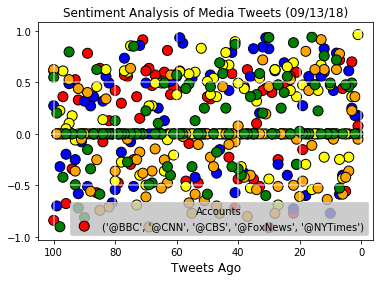

In [7]:
from pylab import figure, axes, pie, title, show, savefig
plt.grid(color='white',alpha=.45,linewidth = 2)
plt.scatter((Tweets_for_Graph["Tweet"]),Tweets_for_Graph["Compound"],c=Tweets_for_Graph["Color"],s = 100,edgecolors = 'black')
plt.gca().invert_xaxis()
plt.yticks(np.arange(-1,1.5,.5))
plt.rcParams['axes.facecolor'] = 'silver'
plt.plot

plt.title('Sentiment Analysis of Media Tweets (09/13/18)')
plt.xlabel('Tweets Ago',fontsize = 12)
plt.legend([target_user],loc = 'best',title = 'Accounts')
savefig('Tweet_Sentiments.png', bbox_inches='tight')
#plt.gca().legend([scatters],['test'])

In [8]:
len(target_user)

5

In [9]:
Tweets_for_Bar = Tweets_for_Graph.groupby(["Account"]).mean().reset_index()
Tweets_for_Bar

,Account,Compound,Negative,Positive,Neutral,Tweet
0,@BBC,0.136322,0.05223,0.10708,0.84069,50.5
1,@CBS,0.148609,0.03642,0.09582,0.86775,50.5
2,@CNN,0.113191,0.05214,0.09632,0.85154,50.5
3,@FoxNews,-0.086379,0.10915,0.07487,0.81600,50.5
4,@NYTimes,0.088523,0.05335,0.09192,0.85471,50.5


In [10]:
mean_sentiments = []

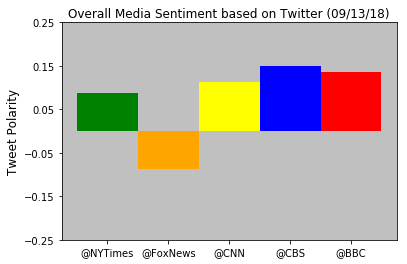

In [12]:
from pylab import figure, axes, pie, title, show, savefig
plt.bar((Tweets_for_Bar["Account"]),Tweets_for_Bar["Compound"],width=1, color=cs, linewidth=5)
plt.gca().invert_xaxis()
plt.yticks(np.arange(-.25,.35,.1))
plt.rcParams['axes.facecolor'] = 'silver'

plt.title('Overall Media Sentiment based on Twitter (09/13/18)')
plt.ylabel('Tweet Polarity',fontsize = 12)
savefig('Tweet_Polarity.png', bbox_inches='tight')